In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house_price_bd.csv')
df.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [3]:
print('This dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

This dataset has 3865 rows and 9 columns.


In [4]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status',
       'Floor_area', 'City', 'Price_in_taka', 'Location'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [6]:
df['Floor_no'].value_counts()

Floor_no
1                       532
4                       418
5                       402
2                       397
3                       366
6                       316
7                       252
8                       228
9                       167
10                       30
11                       26
12                       19
13                        8
Merin City - Purbach      6
8th                       2
4th to 8th Backside       2
14                        2
1st                       1
G+7                       1
0+7                       1
A1,A2,A3,A4,A5,A6,A7      1
1F                        1
18                        1
5th                       1
17                        1
Name: count, dtype: int64

In [7]:
def clean_floor_no(floor):
    # Convert to string if it's not already
    if not isinstance(floor, str):
        return None
    
    # Convert to lower case
    floor = floor.lower()
    
    # If it's numeric, return as is
    if floor.isdigit():
        return floor
    
    # If it ends with 'st', 'nd', 'rd', or 'th', remove the suffix
    if floor.endswith('st') or floor.endswith('nd') or floor.endswith('rd') or floor.endswith('th'):
        return floor.rstrip('stndrth')
    
    # If it doesn't meet the above criteria, return None (indicating removal)
    return None

df['Floor_no'] = df['Floor_no'].apply(clean_floor_no)
df = df.dropna(subset=['Floor_no'])
df['Floor_no'] = pd.to_numeric(df['Floor_no'],errors='coerce')

df['Floor_no'].dtype

dtype('int64')

In [8]:
df['Price_in_taka'].value_counts()

Price_in_taka
৳6,000,000     92
৳5,000,000     82
৳6,500,000     82
৳8,000,000     74
৳5,500,000     69
               ..
৳3,535,000      1
৳5,805,000      1
৳4,536,000      1
৳5,060,000      1
৳49,500,000     1
Name: count, Length: 628, dtype: int64

In [9]:
# Function to clean the 'Price_in_taka' column
def clean_price(price):
    # Remove the currency symbol (assuming it's always '৳')
    price = price.replace('৳', '')
    
    # Remove commas
    price = price.replace(',', '')
    
    # Convert to numeric (int or float)
    price = pd.to_numeric(price, errors='coerce')
    
    return price

# Apply the cleaning function to the 'Price_in_taka' column
df['Price_in_taka'] = df['Price_in_taka'].apply(clean_price)
df['Price_in_taka'].dtype

dtype('int64')

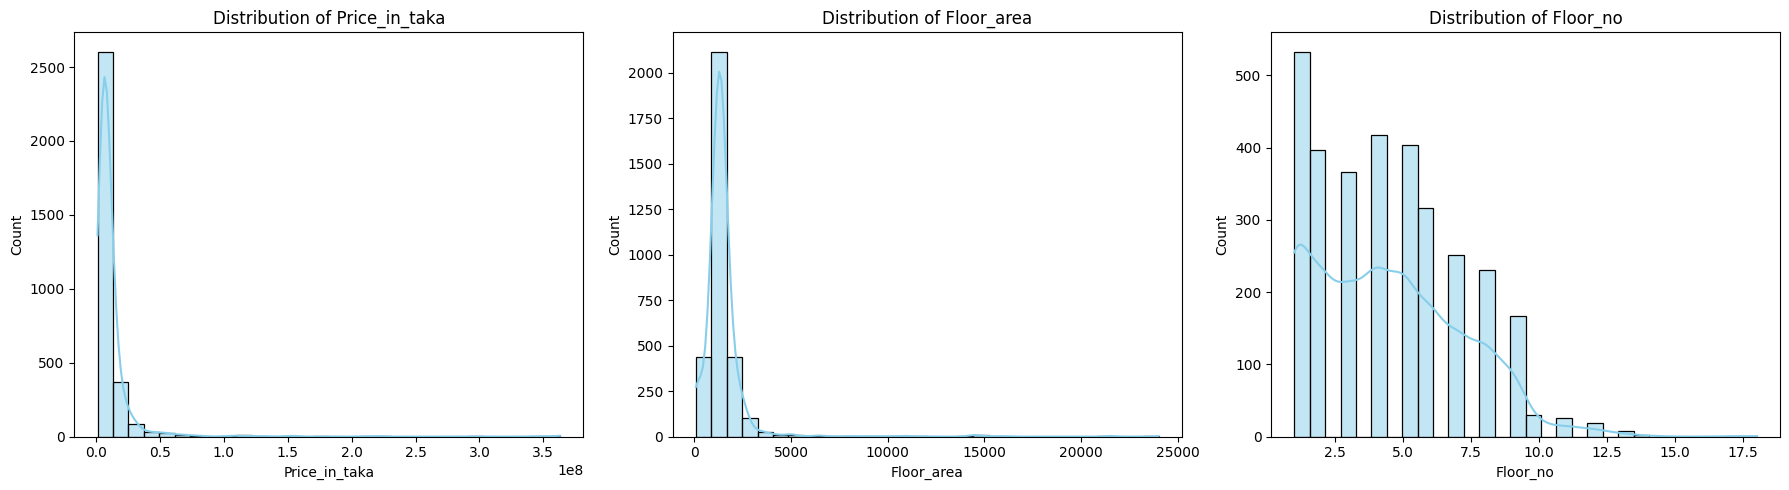

         Feature  Skewness  Kurtosis   P-Value     Verdict
0  Price_in_taka     10.62    141.33  3.44e-77  Not Normal
1     Floor_area      8.87    104.08  1.53e-73  Not Normal
2       Floor_no      0.57     -0.12  1.49e-34  Not Normal


In [10]:

from scipy import stats




# 1. Select Numeric Features
numeric_cols = ['Price_in_taka', 'Floor_area', 'Floor_no']

# 2. Visual Distribution Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    # Histplot with Kernel Density Estimate (KDE) line
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

# 3. Statistical Normality Testing
results = []
for col in numeric_cols:
    # Calculate Skewness and Kurtosis
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    
    # Shapiro-Wilk Test for Normality
    # H0: Data is normally distributed
    # H1: Data is NOT normally distributed
    stat, p_value = stats.shapiro(df[col])
    
    normality = "Normal" if p_value > 0.05 else "Not Normal"
    
    results.append({
        'Feature': col,
        'Skewness': round(skew, 2),
        'Kurtosis': round(kurt, 2),
        'P-Value': f"{p_value:.2e}", # Scientific notation for small p-values
        'Verdict': normality
    })

# Display Results
stats_df = pd.DataFrame(results)
print(stats_df)

In [11]:
df.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2826.000000,2826.000000,3169.000000,3169.000000,3.169000e+03
mean,2.995046,2.946214,4.448091,1476.314295,1.166222e+07
std,1.071915,0.799519,2.676103,1438.391520,2.270795e+07
min,1.000000,1.000000,1.000000,84.000000,1.050000e+06
25%,3.000000,3.000000,2.000000,1080.000000,5.000000e+06
50%,3.000000,3.000000,4.000000,1320.000000,7.100000e+06
75%,3.000000,3.000000,6.000000,1580.000000,1.102820e+07
max,27.000000,10.000000,18.000000,24000.000000,3.632000e+08


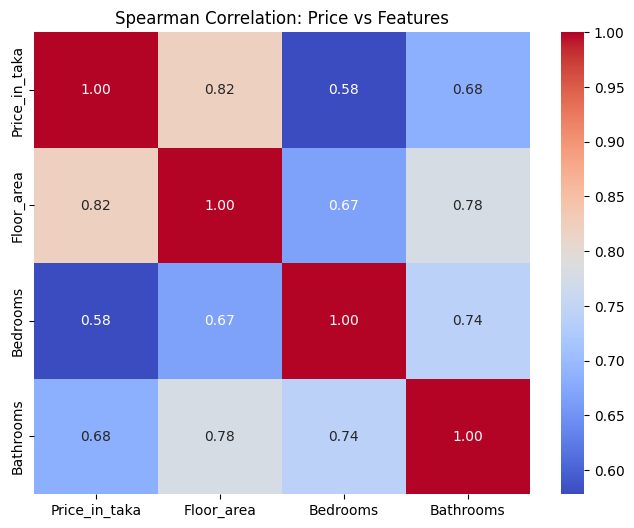

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# We use a temporary variable just for plotting to remove empty rows
# This ensures the plot doesn't crash on missing values
plot_data = df.dropna(subset=['Price_in_taka', 'Floor_area', 'Bedrooms', 'Bathrooms'])

# Calculate Spearman correlation
# (Spearman is better here because it handles the non-linear jump in house prices)
cols_to_check = ['Price_in_taka', 'Floor_area', 'Bedrooms', 'Bathrooms']
corr_matrix = plot_data[cols_to_check].corr(method='spearman')

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation: Price vs Features")
plt.show()

<Axes: >

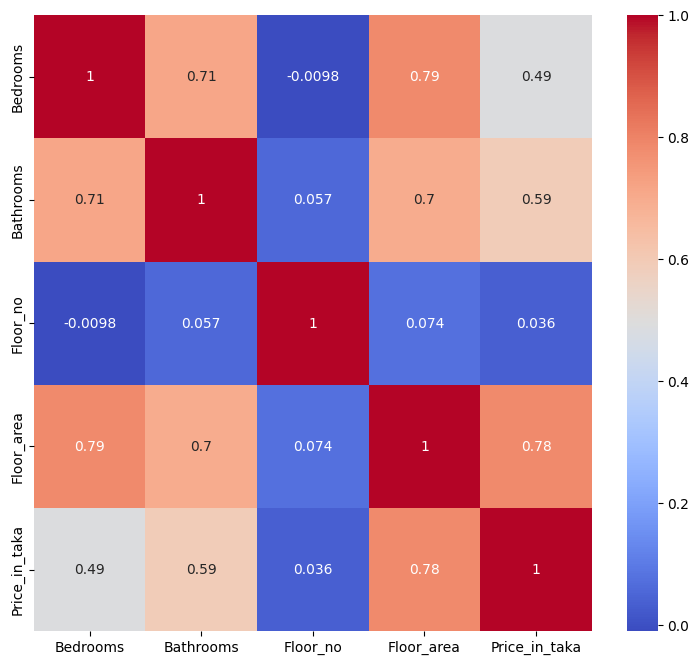

In [13]:
df_corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(9, 8))
sns.heatmap(df_corr,cmap ='coolwarm', annot=True)

<Figure size 500x500 with 0 Axes>

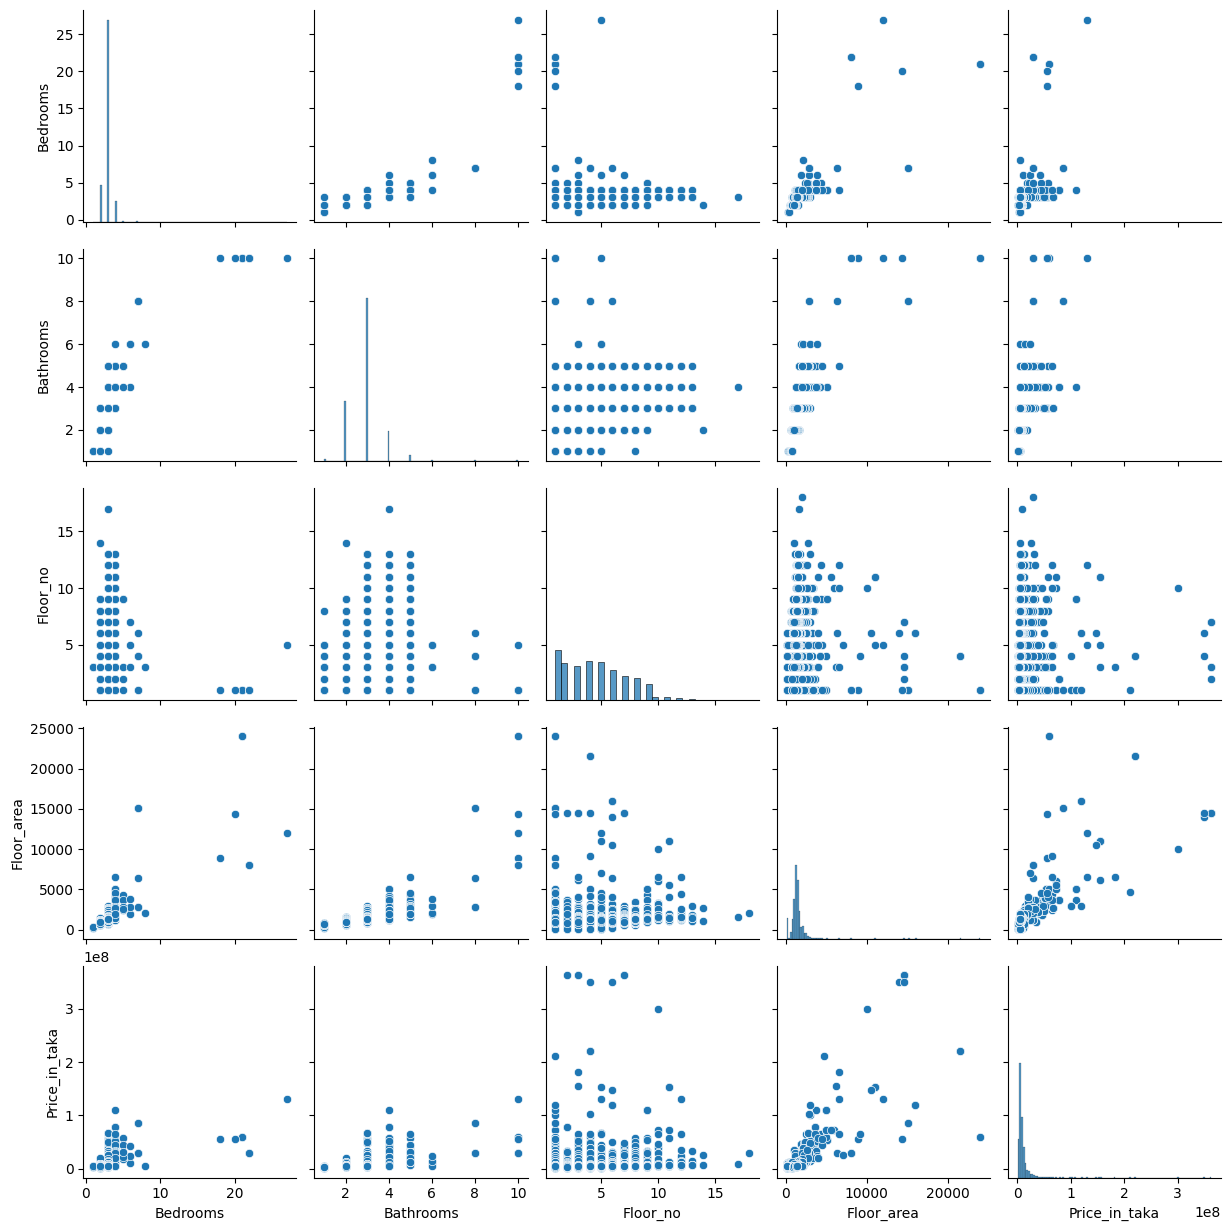

In [14]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

In [15]:
print('Percentage of missing values')
df.isnull().sum() / len(df) * 100

Percentage of missing values


Title                0.000000
Bedrooms            10.823604
Bathrooms           10.823604
Floor_no             0.000000
Occupancy_status     0.000000
Floor_area           0.000000
City                 0.000000
Price_in_taka        0.000000
Location             0.031556
dtype: float64

In [16]:
# Write a function to impute missing values of a column base on another column
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
def impute_missing_values(df, target_col, predictor_col, n_estimators=100, random_state=42):
    
    # Split the data into two sets: one with missing values and one without
    df_missing = df[df[target_col].isna()]
    df_non_missing = df.dropna(subset=[target_col])
    
    # Prepare the features (predictor) and target
    X = df_non_missing[[predictor_col]]
    y = df_non_missing[target_col]
    
    # Train a Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X, y)
    
    # Predict the missing values
    imputed_values = rf.predict(df_missing[[predictor_col]])
    
    # Fill in the missing values in the original DataFrame
    df.loc[df[target_col].isna(), target_col] = imputed_values
    
    return df

In [17]:
df = impute_missing_values(df,'Bedrooms','Floor_area')
df = impute_missing_values(df,'Bathrooms','Floor_area')

In [18]:
df.duplicated().sum()

np.int64(824)

In [19]:
df.drop_duplicates(inplace=True)

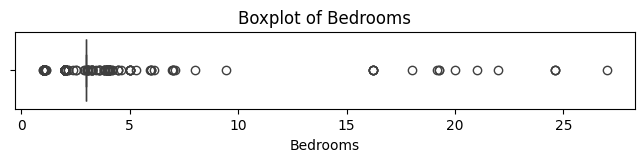

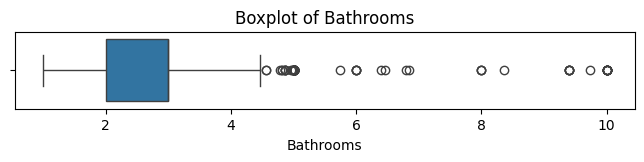

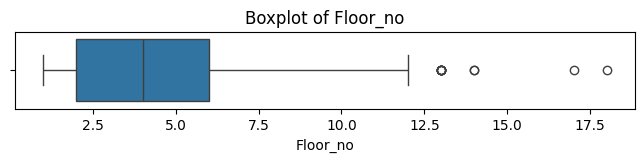

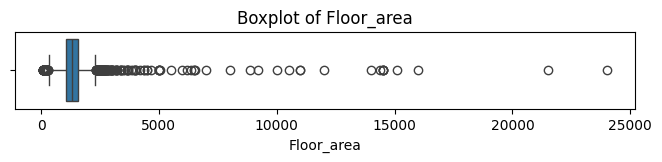

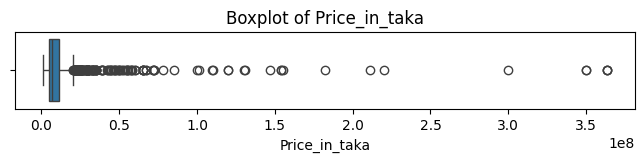

In [20]:
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=numeric_cols[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [21]:
# Remove some rows based on criteria (Bedrooms > 10 or Bathrooms > 4)

df = df[(df['Bedrooms'] < 10) & (df['Bathrooms'] < 4)]

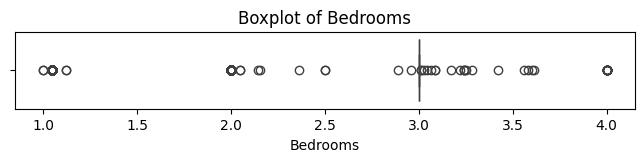

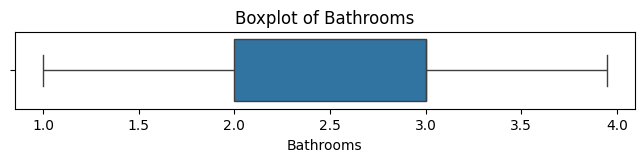

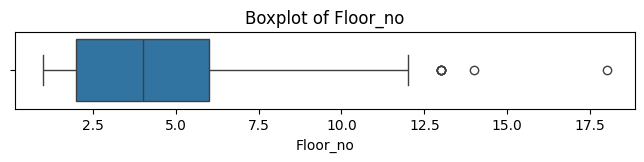

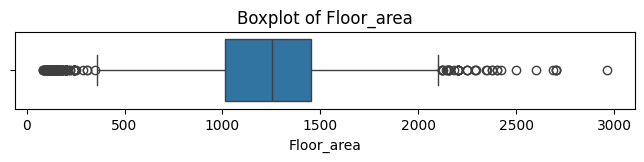

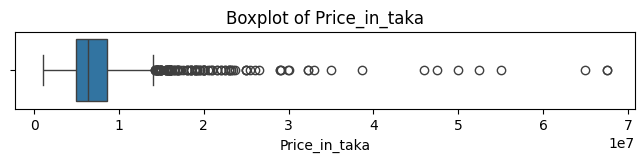

In [22]:
# Let's recheck.

numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=numeric_cols[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [23]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
cat_cols

['Title', 'Occupancy_status', 'City', 'Location']

In [24]:
df['Title'].value_counts()

Title
Buy This 240 Sq Ft Shop At Bakalia                                                                                          2
1445 Sq Ft Residential Apartment Is Available For Sale In Chotora, Cumilla                                                  2
Modern 1150 Sq Ft Flat For Sale In Badda                                                                                    1
Very Near To Janata Bank Limited At Arichpur A 1004 Sq.Ft Residential Apartment For Sale                                    1
Flat For Sale In Mirpur Section 6 Near Mosque                                                                               1
                                                                                                                           ..
Carry Out Your Soothing Days In This 1259 Sq Ft Flat For Sale In Gazipur                                                    1
Make Your Life Easy Buying This 1259 Sq Ft Flat In Gazipur                                                      

In [25]:
df['Occupancy_status'].value_counts()

Occupancy_status
vacant      2005
occupied       2
Name: count, dtype: int64

<Axes: xlabel='Occupancy_status', ylabel='Price_in_taka'>

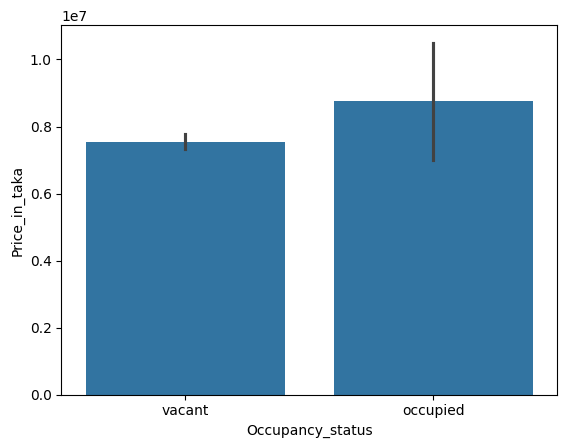

In [26]:
sns.barplot(df,x='Occupancy_status',y='Price_in_taka')

In [27]:
df['City'].value_counts()

City
chattogram          902
dhaka               832
gazipur             139
cumilla             129
narayanganj-city      5
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='Price_in_taka'>

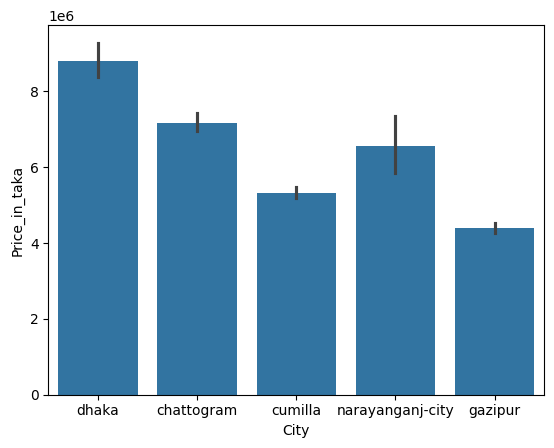

In [28]:
sns.barplot(df,x='City',y='Price_in_taka')

In [29]:
df['Location'].value_counts()

Location
Dewan Bazar, Bakalia                            73
Joydebpur, Gazipur Sadar Upazila                63
Dhaka Trunk Road, 9 No. North Pahartali Ward    57
Tongi, Gazipur Sadar Upazila                    42
North Bagichagaon, Bagichagaon                  35
                                                ..
Mohammad Nagar, Bayazid                          1
Abdullah Khan Road, Sholokbahar                  1
Bayazid Abasic Elaka Road, Bayazid               1
Road No 25, Banani                               1
Chowrasta, Chandra                               1
Name: count, Length: 406, dtype: int64

In [30]:
# Drop columns that are not useful for prediction
df.drop(['Title', 'Occupancy_status'], axis=1, inplace=True)

# Feature Engineering: Extract 'Area' from 'Location'
# The Location column looks like "Neighborhood, Area"
# We'll split by the comma and take the last part as the 'Area'
df['Area'] = df['Location'].str.split(',').str[-1].str.strip()

# Check the value counts of the new 'Area' feature
area_counts = df['Area'].value_counts()

# Group rare areas (e.g., those with fewer than 10 listings) into 'Other'
# This prevents our model from having too many columns after one-hot encoding
areas_to_group = area_counts[area_counts < 10].index
df['Area_Cleaned'] = df['Area'].replace(areas_to_group, 'Other')

# We can now drop the original 'Location', 'City', and 'Area' columns
df.drop(['Location', 'City', 'Area'], axis=1, inplace=True)

print(f"Original unique locations: {len(area_counts)}")
print(f"Cleaned unique areas: {len(df['Area_Cleaned'].unique())}")

df.head()

Original unique locations: 92
Cleaned unique areas: 36


,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka,Area_Cleaned
1,3.0,3.0,1,1705.0,16900000,Other
2,3.0,3.0,6,1370.0,12500000,Other
3,3.0,3.0,4,2125.0,20000000,Bashundhara R-A
4,3.0,3.0,4,2687.0,47500000,Other
5,3.0,3.0,3,1150.0,8800000,Badda


In [31]:



from sklearn.model_selection import train_test_split

# One-hot encode the 'Area_Cleaned' categorical feature
df = pd.get_dummies(df, columns=['Area_Cleaned'], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Price_in_taka', axis=1)
y = df['Price_in_taka']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

# Identify the numeric columns that need scaling
# We don't scale the one-hot encoded 'Area_Cleaned_' columns
numeric_features = ['Bedrooms', 'Bathrooms', 'Floor_area']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data's numeric features
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform the test data's numeric features using the SAME scaler
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Scaling complete.")
X_train.head()

Scaling complete.


,Bedrooms,Bathrooms,Floor_no,Floor_area,Area_Cleaned_15 No. Bagmoniram Ward,Area_Cleaned_16 No. Chawk Bazaar Ward,Area_Cleaned_33 No. Firingee Bazaar Ward,Area_Cleaned_4 No Chandgaon Ward,Area_Cleaned_7 No. West Sholoshohor Ward,Area_Cleaned_9 No. North Pahartali Ward,...,Area_Cleaned_Khulshi,Area_Cleaned_Kotwali,Area_Cleaned_Lal Khan Bazaar,Area_Cleaned_Mirpur,Area_Cleaned_Mohammadpur,Area_Cleaned_Muradpur,Area_Cleaned_Other,Area_Cleaned_Sholokbahar,Area_Cleaned_Thakur Para,Area_Cleaned_Uttara
1775,0.503269,0.646613,3,1.226973,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
580,0.503269,-0.864685,2,-0.338594,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1095,0.503269,0.646613,3,0.891177,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2474,0.503269,0.646613,1,0.448637,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
548,0.503269,0.646613,4,0.070589,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# ==========================================
# 1. Optimize Random Forest (The robust choice)
# ==========================================
print("--- Optimizing Random Forest ---")

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Tries different ways to split features
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best Random Forest Params: {rf_grid.best_params_}")

# ==========================================
# 2. Optimize Gradient Boosting (The high-potential choice)
# ==========================================
print("\n--- Optimizing Gradient Boosting ---")

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1], # Crucial parameter for GB
    'max_depth': [3, 5, 7],             # GB prefers shallow trees usually
    'subsample': [0.8, 1.0]             # Fraction of samples for fitting trees
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
print(f"Best Gradient Boosting Params: {gb_grid.best_params_}")

# ==========================================
# 3. Final Showdown
# ==========================================
models = {
    'Tuned Random Forest': best_rf,
    'Tuned Gradient Boosting': best_gb
}

final_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    final_results.append({
        'Model': name,
        'R-squared': r2,
        'MAE': mae,
        'RMSE': rmse
    })

final_df = pd.DataFrame(final_results).sort_values(by='R-squared', ascending=False)
print("\n--- FINAL LEADERBOARD ---")
print(final_df)

--- Optimizing Random Forest ---
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Params: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}

--- Optimizing Gradient Boosting ---
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

--- FINAL LEADERBOARD ---
                     Model  R-squared           MAE          RMSE
1  Tuned Gradient Boosting   0.806594  1.222115e+06  2.111122e+06
0      Tuned Random Forest   0.768165  1.162507e+06  2.311362e+06
